In [1]:
import pickle
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

files = glob.glob('results/alpha*_drop*_lists.pkl')

In [2]:
train_aac_list = {}
train_loss_list = {}
test_aac_list = {}

for file in files:
    try:
        # Load the pickled list from a file
        with open(file, 'rb') as f:
            x = list(pickle.load(f))

        train_aac_list[file] = x[0]
        train_loss_list[file] = x[1]
        test_aac_list[file] = x[2]
    except:
        print(file)

In [3]:
f = []
best = 0
df = pd.DataFrame(columns=['alpha', 'dropout', 'best_test_aac', 'epoch'])

for file, test_aac in test_aac_list.items():
    try:
        alpha = "0."+str(file.split('_')[0].split('.')[1])
        drop_rate = "0."+str(file.split('_')[1].split('.')[1])
        best_test_aac = max(test_aac)
        epoch = test_aac.index(best_test_aac)+1
        if len(file.split('_')) ==3:
            df.loc[len(df)] = [float(alpha), float(drop_rate), best_test_aac, epoch]
#         else:
            f.append(file)
        if best_test_aac<best:
            pass
        else:
            best = best_test_aac
            print(file)
            print(f'alpha is {alpha}')
            print(f'drop_rate is {drop_rate}')
            print(f'epoch is {epoch}')
            print(f'best_test_aac is {best_test_aac}')
            print('=================================================')
    except:
        pass

results/alpha0.3_drop0.1_lists.pkl
alpha is 0.3
drop_rate is 0.1
epoch is 130
best_test_aac is 83.61111111111111
results/alpha0.01_drop0.05_lists.pkl
alpha is 0.01
drop_rate is 0.05
epoch is 91
best_test_aac is 85.74074074074073
results/alpha0.01_drop0.1_reducelr_epoch300_batch256_lists.pkl
alpha is 0.01
drop_rate is 0.1
epoch is 155
best_test_aac is 86.01851851851852
results/alpha0.01_drop0.05_reducelr_epoch300_batch256_lists.pkl
alpha is 0.01
drop_rate is 0.05
epoch is 267
best_test_aac is 86.38888888888889
results/alpha0.01_drop0.05_lr0.004_batch64_epoch300_lists.pkl
alpha is 0.01
drop_rate is 0.05
epoch is 294
best_test_aac is 86.57407407407408


In [4]:
len(f)

88

In [5]:
df

,alpha,dropout,best_test_aac,epoch
0,0.30,0.10,83.611111,130.0
1,0.01,0.05,85.740741,91.0
2,0.90,0.05,81.759259,142.0
3,0.90,0.10,81.203704,58.0
4,0.10,0.20,81.944444,50.0
...,...,...,...,...
83,0.60,0.15,82.314815,120.0
84,0.00,0.30,77.870370,140.0
85,0.40,0.30,84.259259,140.0
86,0.80,0.30,81.018519,72.0


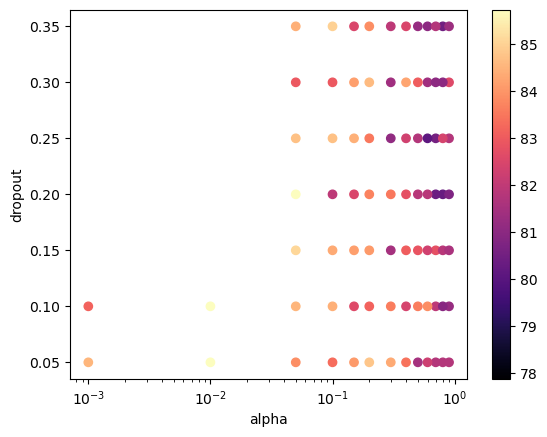

In [6]:
# Create scatter plot
plt.scatter(df['alpha'], df['dropout'], c=df['best_test_aac'], cmap='magma')

# Add color bar
plt.colorbar()
# Add x and y axis labels
plt.xlabel('alpha')
plt.ylabel('dropout')
plt.xscale('log')
# Show plot
plt.show()